In [1]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import json

import matplotlib.pyplot as plt

import db

In [2]:
# load the existing data
# Opening JSON file
f = open('staged/cached_translations.json')

# returns JSON object as 
# a dictionary
translations = json.load(f)
f.close()

In [7]:
edition = 2024

sql = """
SELECT O.position, A.name, S.rowid AS song_id, S.title, S.year
FROM OCCURANCE O 
INNER JOIN Song S ON S.rowid = O.song
INNER JOIN Artist A ON A.rowid = S.artist
WHERE O.edition = {current}
ORDER BY O.position ASC
""".format(current=edition)

df = db.dataframe(sql).set_index("position")
df.head()

,name,song_id,title,year
position,,,,
1,Queen,3123,Bohemian Rhapsody,1975
2,Coldplay,831,Fix You,2005
3,Eagles,1202,Hotel California,1977
4,Danny Vera,4682,Roller Coaster,2019
5,Billy Joel,417,Piano Man,1973


In [8]:
untranslated = [t for t in df.title if t not in translations]
df['translation'] = [translations[t]['translation'] if t in translations else t for t in df.title]
print("There are %d titles without a translation" % len(untranslated))
df.head()

There are 203 titles without a translation


,name,song_id,title,year,translation
position,,,,,
1,Queen,3123,Bohemian Rhapsody,1975,Bohemian Rhapsody
2,Coldplay,831,Fix You,2005,Fix You
3,Eagles,1202,Hotel California,1977,Hotel California
4,Danny Vera,4682,Roller Coaster,2019,Roller Coaster
5,Billy Joel,417,Piano Man,1973,Piano Man


In [9]:
text = " ".join(title for title in df.translation)
print ("There are {} words in the combination of all titles.".format(len(text)))


There are 34419 words in the combination of all titles.


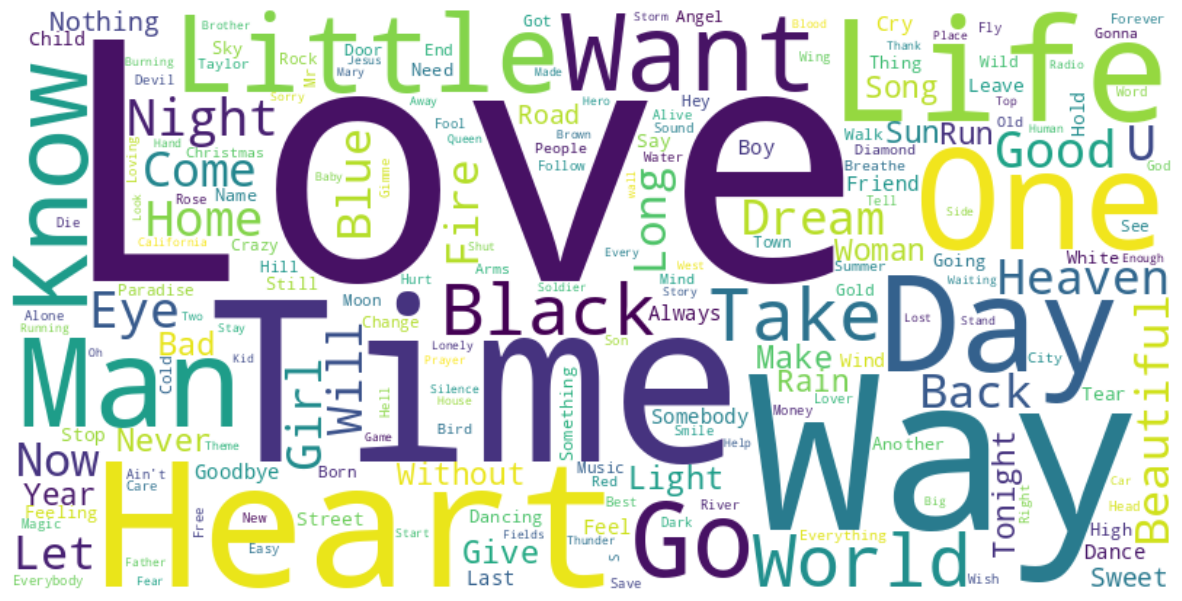

In [10]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["albumversie", "live", "unplugged", "Album", "version", "de", "het"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
